# MRI Synthesis

In this notebook, we will use transforms that generate synthetic MRIs with varying contrast and resolution from label maps.

This is a reimplementation of the domain randomization approach described in:

Billot, B., Greve, D.N., Puonti, O., Thielscher, A., Van Leemput, K., Fischl, B., Dalca, A.V. and Iglesias, J.E., 2023.
[**SynthSeg: Segmentation of brain MRI scans of any contrast and resolution without retraining.**](https://www.sciencedirect.com/science/article/pii/S1361841523000506)
_Medical image analysis_, 86, p.102789.

        @article{billot2023synthseg,
          title     = {SynthSeg: Segmentation of brain MRI scans of any contrast and resolution without retraining},
          author    = {Billot, Benjamin and Greve, Douglas N and Puonti, Oula and Thielscher, Axel and Van Leemput, Koen and Fischl, Bruce and Dalca, Adrian V and Iglesias, Juan Eugenio and others},
          journal   = {Medical image analysis},
          volume    = {86},
          pages     = {102789},
          year      = {2023},
          publisher = {Elsevier},
          url       = {https://www.sciencedirect.com/science/article/pii/S1361841523000506}
        }

In [1]:
import torch
import matplotlib.pyplot as plt
from cornucopia import IntensityTransform, SynthFromLabelTransform, RandomGaussianMixtureTransform
from cornucopia.utils.py import meshgrid_ij

First, let us generate a synthetic label map. We use a numerical phantom
made of circles with varying radii.

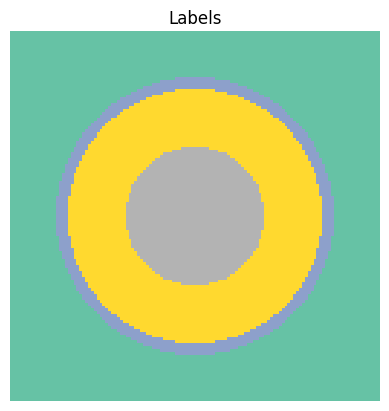

In [2]:
shape = [128, 128]
radius = torch.stack(meshgrid_ij(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

lab = torch.zeros_like(radius, dtype=torch.long)
lab[radius < 48] = 1
lab[radius < 44] = 2
lab[radius < 24] = 3

plt.imshow(lab, cmap='Set2', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

Then, instantiate a `IntensityTransform` and apply it to our labels.
Note that tensors fed to a `Transform` layer should have a channel dimension, and no batch dimension.

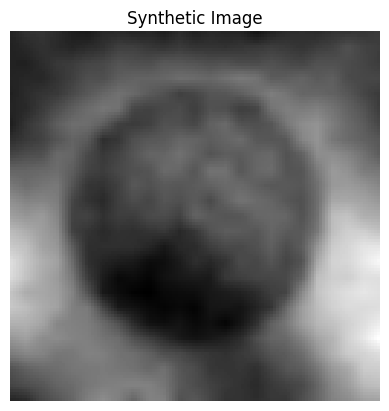

In [3]:
trf = RandomGaussianMixtureTransform() + IntensityTransform()
img = trf(lab[None])[0]   # needs channel dimension

plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Synthetic Image')
plt.show()

Now, let's synthesize a bunch of them

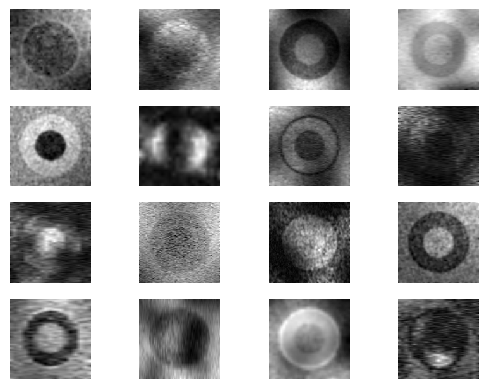

In [4]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(lab[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()

Finally, let's try the full pipeline with deformations

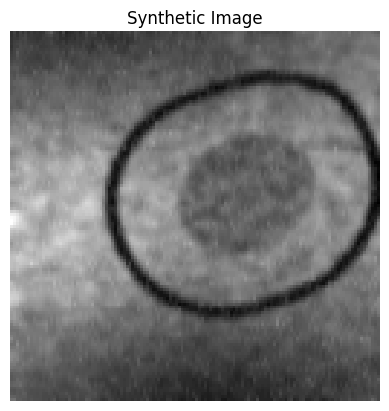

In [5]:
trf = SynthFromLabelTransform()
img, newlab = trf(lab[None])   # needs channel dimension
img, newlab = img[0], newlab[0]

plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Synthetic Image')
plt.show()

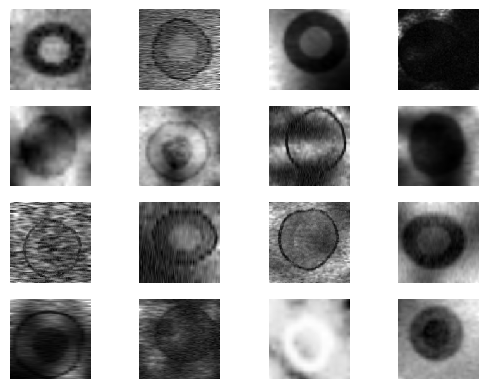

In [6]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(lab[None])[0][0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()